<a href="https://colab.research.google.com/github/imrealhelper/Linear-Algebra/blob/main/soft_ware_labs/ase3001_exercises_state_estimation_and_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# State estimation and filtering

<style>
.MathJax {
  font-family: "Common HTML";
}
</style>

$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
\newcommand{\loss}{\ell}
\newcommand{\eloss}{\mc{L}}
\newcommand{\abs}[1]{| #1 |}
\newcommand{\norm}[1]{\| #1 \|}
\newcommand{\tp}{T}
$$

__<div style="text-align: right"> ASE3001: Computational Experiments for Aerospace Engineering, Inha University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@inha.ac.kr) </div>_


<br>

___

<br>

A discrete-time linear dynamical system consists of a sequence of state vectors $x_t \in \R^n$, indexed by time $t\in \{0,\dots,N-1\}$ and dynamics equations

$$
\begin{aligned}
  x_{t+1} &= Ax_t + Bw_t \\
  y_{t} &= Cx_t + n_t   
\end{aligned}
$$

where $w_t\in\R^m$ is an disturbance input to the dynamical system (say, a wind force acting on a drone), $y_t\in\R^r$ is a  measurement vector, $n_t\in\R^r$ is the measurement noise, $A$ is the drift matrix, $B$ is the input matrix, and $C$ is the observation matrix. Note that the state variable $x_t$ for $t=0,\dots,N$ is not available to us.

The goal of this problem is to estimate $x_t$ for $t=0,\dots,N−1$, given $A$, $B$, $C$, and $y_t$ for $t=0,\dots,N$.


<br>

Throughout this problem, we will consider a one dimensional vehicle tracking problem with state $x_t=(p_t, v_t)\in\R^2$, where the states are the position, $p_t$, and the velocity, $v_t$, of the vehicle. The vehicle is influenced by an unknown disturbance force $w_t$, and we observe noisy measurements of the vehicle's position, $y_t\in\R$.

This is governed by

$$
\begin{aligned}
  \dot{v} &= w - \gamma v  \\
  \dot{p} &= v  
\end{aligned}
$$

where a small constant $\gamma$ is the friction (or damping) coefficient. Trapezoidal integration assuming constant acceleration during the sampling interval gives,

$$
\begin{aligned}
  v_{t+1} &= v_t + {\Delta t}\left( w_t - \gamma v_t  \right) \\
  &= \left(1-\gamma \Delta t\right) v_t + \Delta t w_t \\
  p_{t+1} &= p_t + \frac{\Delta t}{2}\left( v_t + v_{t+1} \right)  \\
  &= p_t + \frac{\Delta t}{2}\left( v_t + \left(1-\gamma \Delta t\right) v_t + \Delta t w_t \right)  \\
  &= p_t +  \left(\Delta t-\frac{1}{2}\gamma\Delta t^2\right) v_t + \frac{1}{2} \Delta t^2 w_t
\end{aligned}
$$

<br>

Now we have the aboveThen the following matrices describe the above dynamics.

$$
\begin{aligned}
  x_{t+1} &= Ax_t + Bw_t \\
  y_{t} &= Cx_t + n_t   
\end{aligned}
$$

with $x_t = (p_t, v_t)$ and

$$
A = \bmat{
1 & \left(1-0.5\gamma\Delta t\right)\Delta t \\
0 & 1-\gamma\Delta t
}, \quad
B = \bmat{
0.5\Delta t^2 \\
\Delta t
}, \quad
C = \bmat{1 & 0 }
$$

<br>

We further assume that the two noise components, $w_t$ and $n_t$, both are independent and identically distributed (IID) standard normal random variables with zero mean and unit variance. In other words, $w_t \sim {N}(0,1)$ and $n_t \sim {N}(0,1)$.

<br>

The following simulates the above for $0\le t \le 50$ with $\Delta t=0.05$ and $\gamma=0.05$.


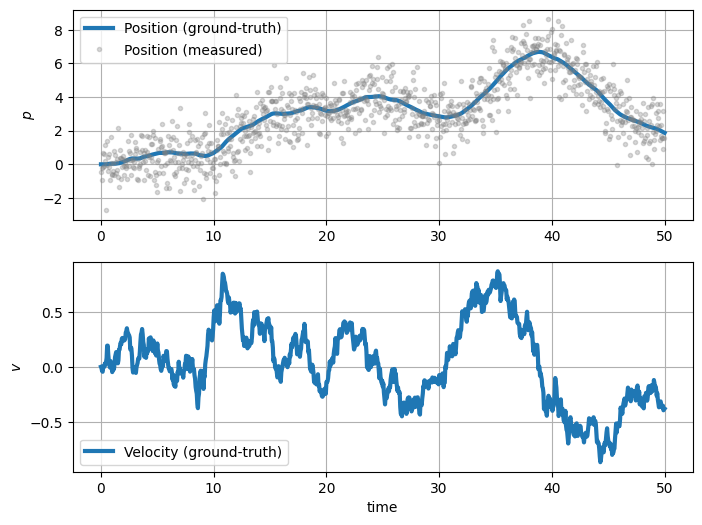

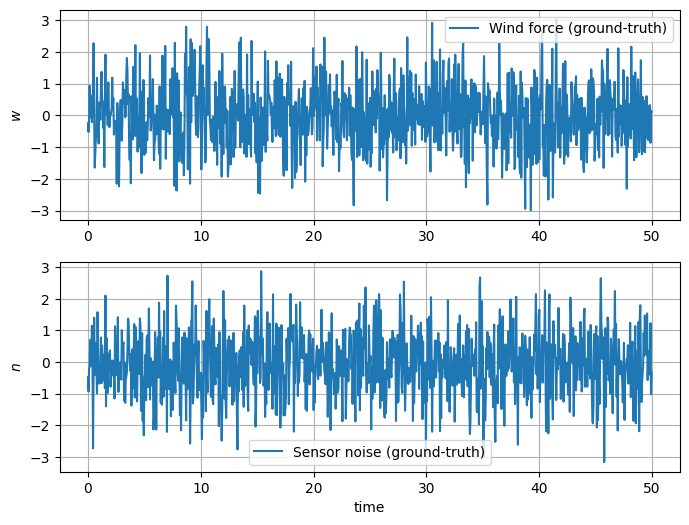

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000 # number of timesteps
T = 50 # time will vary from 0 to T with step delt
ts = np.linspace(0,T,N+1)
delt = T/N
gamma = .05 # damping, 0 is no damping

A = np.zeros((2,2))
B = np.zeros((2,1))
C = np.zeros((1,2))

A[0,0] = 1
A[0,1] = (1-gamma*delt/2)*delt
A[1,1] = 1 - gamma*delt

B[0,0] = delt**2/2
B[1,0] = delt

C[0,0] = 1

np.random.seed(30010)

x = np.zeros((2,N+1))
x[:,0] = [0,0]
y = np.zeros((1,N))

w = np.random.randn(1,N)
n = np.random.randn(1,N)

for t in range(N):
    y[:,t] = C.dot(x[:,t]) + n[:,t]
    x[:,t+1] = A.dot(x[:,t]) + B.dot(w[:,t])

x_true = x.copy()
w_true = w.copy()
n_true = n.copy()

plt.figure(figsize=(8,6), dpi=100)
plt.subplot(2,1,1)
plt.plot(ts,x[0,:], linewidth=3, label='Position (ground-truth)')
plt.plot(ts[:-1],y[0,:], '.', color='gray', linewidth=2, alpha=0.3, \
         label='Position (measured)')
plt.ylabel(r'$p$')
plt.legend()
plt.grid()
plt.subplot(2,1,2)
plt.plot(ts,x[1,:], linewidth=3, label='Velocity (ground-truth)')
plt.xlabel('time')
plt.ylabel(r'$v$')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(8,6), dpi=100)
plt.subplot(2,1,1)
plt.plot(ts[:-1],w_true[0,:], label='Wind force (ground-truth)')
plt.ylabel(r"$w$")
plt.legend()
plt.grid()
plt.subplot(2,1,2)
plt.plot(ts[:-1],n_true[0,:], label='Sensor noise (ground-truth)')
plt.xlabel('time')
plt.ylabel(r'$n$')
plt.legend()
plt.grid()
plt.show()

<br>

So the problem is now to estimate $x_t = (p_t, v_t)$ with the given position measurement, $y_t$. We use the hat notation to denote the estimates. For example,

$$
  \hat{x}_t = (\hat{p}_t, \hat{v}_t)
$$

is the position and velocity estimates.


<br>

___

<br>

_**(Problem 1)**_
A very naive approach to compute the above state estimates is as follows.

<br>

1) Since the position ($p_t$) was measured by $y_t$, we believe our measurement entirely. In other words, we let

$$
\hat{p}^{\text{naive}}_t = y_t
$$

<br>

2) Since we don't have direct measurements on the velocity ($v_t$), we numerically differentiate $\hat{p}^{\text{naive}}_t$ to compute $\hat{v}^{\text{naive}}_t$. In other words, we let

$$
  \hat{v}^{\text{naive}}_t = \frac{\hat{p}^{\text{naive}}_t - \hat{p}^{\text{naive}}_{t-1}}{\Delta t} = \frac{y_t-y_{t-1}}{\Delta t}
$$

<br>

Implement this, and compare the state estimates with the true state variables. Overlap $\hat{p}^{\text{naive}}_t$ and ${p}_t$ on a single plot, and $\hat{v}^{\text{naive}}_t$ and ${v}_t$ on another plot.

What do you observe?

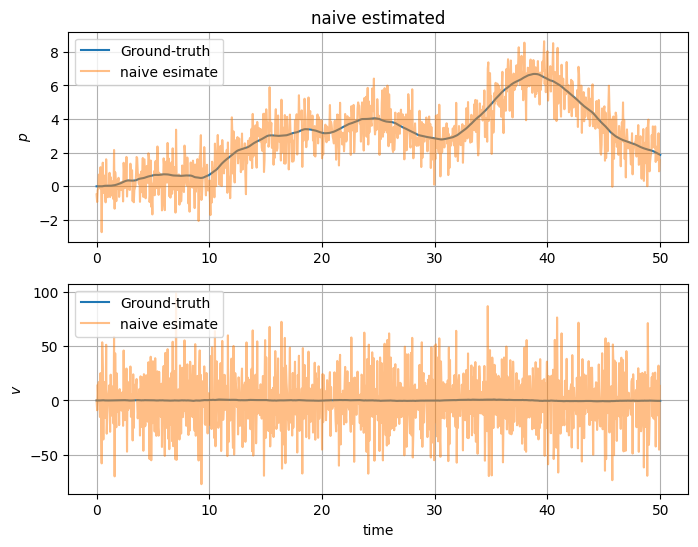

In [4]:
# your code here
p_naive = y[0]
v_naive = np.zeros_like(p_naive)
for i in range(1,len(p_naive)):

  v_naive[i] = (p_naive[i]- p_naive[i-1])/0.05


plt.figure(figsize=(8,6), dpi=100)

plt.subplot(2,1,1)
plt.title("naive estimated")
plt.plot(ts,x[0,:], label='Ground-truth')
plt.plot(ts[:-1],p_naive, alpha=0.5, label='naive esimate')
plt.ylabel(r'$p$')
plt.legend()
plt.grid()
plt.subplot(2,1,2)
plt.plot(ts,x[1,:], label='Ground-truth')
plt.plot(ts[:-1],v_naive, alpha=0.5, label='naive esimate')
plt.xlabel('time')
plt.ylabel(r'$v$')
plt.legend()
plt.grid()

plt.show()

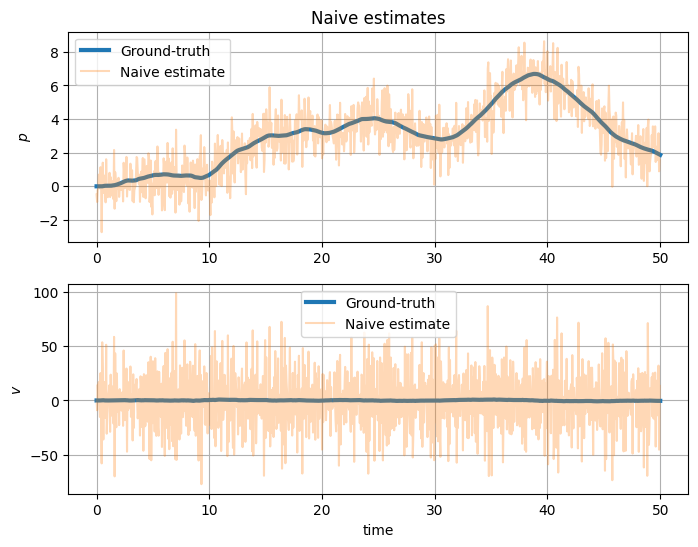

In [ ]:
# your code here


<br>

___

<br>

_**(Problem 2)**_ Since the above estimates look severely corrupted by shigh frequency noise components, we would like to use low pass filters to smooth them out. Though there are sophisticated ways of designing and implementing the discrete-time low pass filters, we would go with a simle first-order recursive form described below.

The low-pas-filtered signal $\hat{p}^{\text{lpf}}_t$ for the naive estimate $\hat{p}^{\text{naive}}_t$ is given by

$$
\hat{p}^{\text{lpf}}_{t+1} = a  \hat{p}^{\text{lpf}}_{t} + b \left(\hat{p}^{\text{naive}}_{t+1} + \hat{p}^{\text{naive}}_{t}\right)
$$

where we will use $(a,b)=(0.9047619,0.04761905)$ for position estimates and $(a,b)=(0.99004975,0.00497512)$ for velocity estimates. The following cell computes these numbers, but you don't have to care about it.

In [5]:
import scipy.signal as sps
bw_p = 2
bw_v = 0.2
lpf_p = sps.cont2discrete(([bw_p],[1.,bw_p]), delt, method='bilinear')
lpf_v = sps.cont2discrete(([bw_v],[1.,bw_v]), delt, method='bilinear')
print(lpf_p)
print(lpf_v)

(array([[0.04761905, 0.04761905]]), array([ 1.       , -0.9047619]), 0.05)
(array([[0.00497512, 0.00497512]]), array([ 1.        , -0.99004975]), 0.05)


<br>

Using these coefficients, implement the low pass filter and compare the state estimates with the true state variables. Overlap $\hat{p}^{\text{lpf}}_t$ and ${p}_t$ on a single plot, and $\hat{v}^{\text{lpf}}_t$ and ${v}_t$ on another plot.

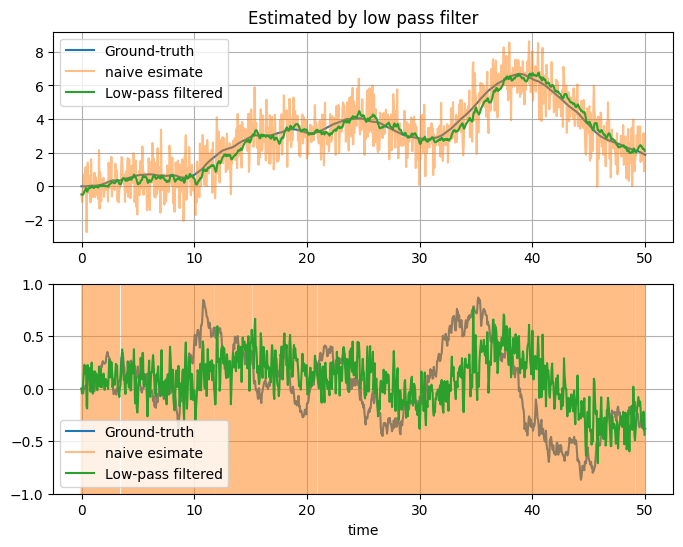

In [36]:
p_lpf = np.zeros_like(p_naive)
p_lpf[0] = p_naive[0]
v_lpf = np.zeros_like(v_naive)
v_lpf[0] = v_naive[0]
for i in range(1,len(p_lpf)):
  p_lpf[i] = 0.9047619*p_lpf[i-1] + 0.04761905*(p_naive[i]+ p_naive[i-1])
  v_lpf[i] = 0.99004975*v_lpf[i-1] + 0.00497512*(v_naive[i]+ v_naive[i-1])

plt.figure(figsize=(8,6), dpi=100)

plt.subplot(2,1,1)
plt.title("Estimated by low pass filter")
plt.plot(ts,x[0,:], label='Ground-truth')
plt.plot(ts[:-1],p_naive, alpha=0.5, label='naive esimate')
plt.plot(ts[:-1],p_lpf, label='Low-pass filtered')
plt.ylabel(r'')
plt.legend()
plt.grid()
plt.subplot(2,1,2)
plt.plot(ts,x[1,:], label='Ground-truth')
plt.plot(ts[:-1],v_naive, alpha=0.5, label='naive esimate')
plt.plot(ts[:-1],v_lpf, label='Low-pass filtered')
plt.xlabel('time')
plt.ylim([-1,1])
plt.ylabel(r'')
plt.legend()
plt.grid()
plt.show()


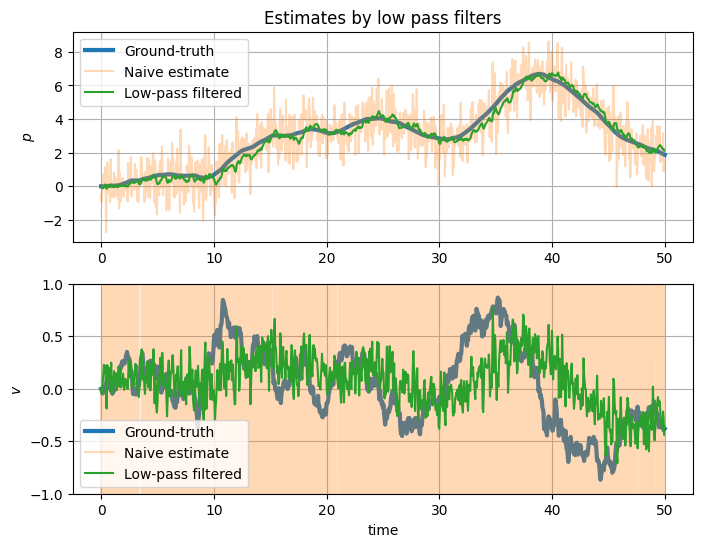

In [ ]:
|# your code here


<br>

___

<br>

_**(Problem 3)**_ An alpha beta filter presumes that a system is adequately approximated by a model having two internal states, where the first state is obtained by integrating the value of the second state over time. Measured system output values correspond to observations of the first model state, plus disturbances. This very low order approximation is adequate for many simple systems, for example, mechanical systems where position is obtained as the time integral of velocity.

Assuming that velocity remains approximately constant over the small time interval $\Delta t$ between measurements, the position state is projected forward to predict its value at the next sampling time using

$$
\tilde{p}_t = \hat{p}_{t-1} + \Delta t \hat{v}_{t-1}
$$

Since velocity variable $v$ is presumed constant, its projected value at the next sampling time equals the current value.

$$
\tilde{v}_t = \hat{v}_{t-1}
$$

If additional information is known about how a driving function will change the $v$ state during each time interval, this can be modified to include it.

<br>

The output measurement is expected to deviate from the prediction because of noise and dynamic effects not included in the simplified dynamic model. This prediction error $r_t$ is also called the residual or innovation,

$$
 r_t = y_t - \tilde{p}_t
$$

<br>

Suppose that the residual $r_t$ is positive. This discrepancy can occur if the previous $p_t$ estimate or $v_t$ estimate was low, or some combination of the two was low. The alpha beta filter takes selected alpha and beta constants (from which the filter gets its name), uses alpha times the deviation $r_t$ to correct the position estimate, and uses beta times the deviation $r_t$ to correct the velocity estimate. An extra $\Delta t$ factor conventionally serves to normalize magnitudes of the multipliers.

$$
\begin{aligned}
\hat{p}_{t+1} &= \tilde{p}_{t} + \alpha\left(y_t - \tilde{p}_t \right) \\
\hat{v}_{t+1} &= \tilde{v}_{t} + \frac{\beta}{\Delta t} \left(y_t - \tilde{p}_t \right)
\end{aligned}
$$

The corrections can be considered small steps along an estimate of the gradient direction. As these adjustments accumulate, error in the state estimates is reduced. Typical choices are

$$
0 < \alpha , \beta < 1
$$

<vr>

Values of $\alpha$ and $\beta$ typically are adjusted experimentally. In general, larger $\alpha$ and $\beta$ gains tend to produce faster response for tracking transient changes, while smaller alpha and beta gains reduce the level of noise in the state estimates. If a good balance between accurate tracking and noise reduction is found, and the algorithm is effective, filtered estimates are more accurate than the direct measurements. This motivates calling the alpha-beta process a filter.

<br>

Implement this alpha beta filter. Experiment with various $\alpha$ and $\beta$ on your given data set to select the best $\alpha$ and $\beta$ that works on your signals.

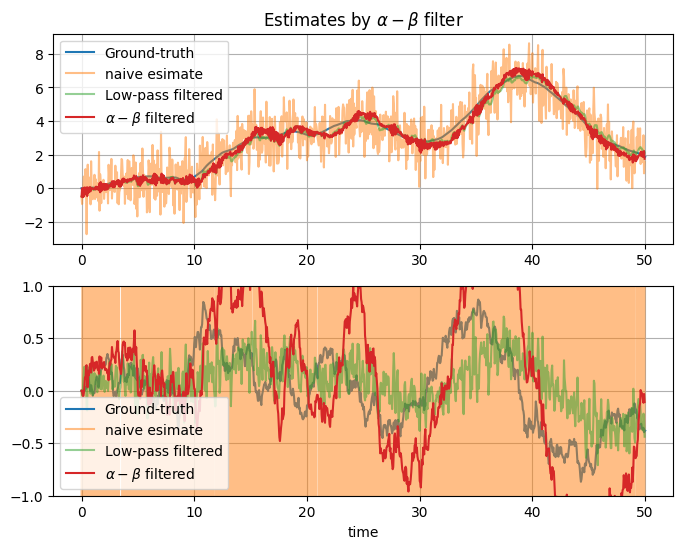

In [20]:
# your code here

alpha =0.1
beta = 0.004
p_sp = np.zeros(len(p_naive))
dt = 0.05
p_sp[1] = p_naive[0] + dt*v_naive[0]
v_sp =  np.zeros(len(p_naive))
v_sp[1] = v_naive[0]
v_es = np.zeros(len(p_naive))
v_es[0] = v_naive[0]
p_es = np.zeros(len(p_naive))
p_es[0] = p_naive[0]

for i in range(1,len(p_naive)-1):
  p_sp[i]= p_es[i-1] + dt*v_es[i-1]
  v_sp[i] = v_es[i]
  p_es[i+1] = p_sp[i] + alpha*(y[0,i]-p_sp[i])
  v_es[i+1] = v_sp[i] + beta/dt*(y[0,i]-p_sp[i])




plt.figure(figsize=(8,6), dpi=100)

plt.subplot(2,1,1)
plt.title(r"Estimates by $\alpha-\beta$ filter")
plt.plot(ts,x[0,:], label='Ground-truth')
plt.plot(ts[:-1],p_naive, alpha=0.5, label='naive esimate')
plt.plot(ts[:-1],p_lpf,  alpha=0.5,label='Low-pass filtered')
plt.plot(ts[:-1],p_es, label= r'$\alpha-\beta$ filtered')
plt.ylabel(r'')
plt.legend()
plt.grid()
plt.subplot(2,1,2)
plt.plot(ts,x[1,:], label='Ground-truth')
plt.plot(ts[:-1],v_naive, alpha=0.5, label='naive esimate')
plt.plot(ts[:-1],v_lpf,  alpha=0.5,label='Low-pass filtered')
plt.plot(ts[:-1],v_es, label= r'$\alpha-\beta$ filtered')
plt.ylim([-1,1])
plt.xlabel('time')
plt.ylabel(r'')
plt.legend()
plt.grid()
plt.show()



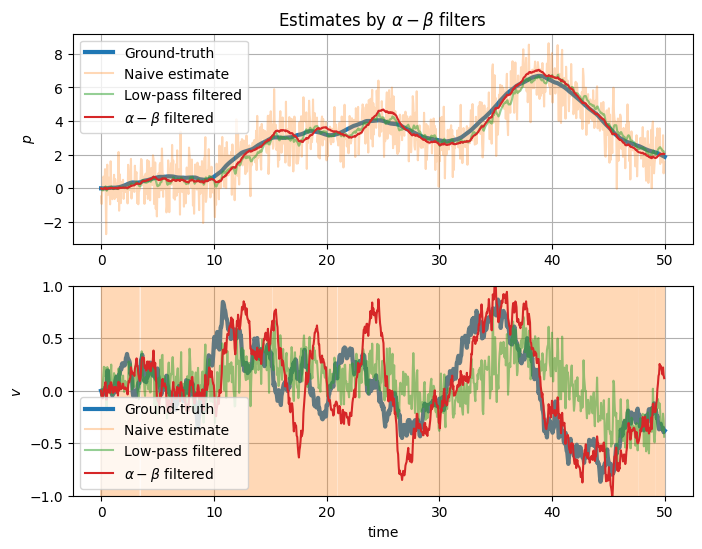

In [ ]:
# your code here


<br>

___

<br>

_**(Problem 4)**_ A better (actually the best) way in short is as follows. We begin with the state estimate, $\hat{x}_t$, and the error covariance of the state variable, $\Sigma_t$, and will recursively propagate them.

\begin{align*}
  \hat{x}_t &= \mathbf{E}\left(x_t \ \vert\ y_0, y_1, \dots, y_{t-1} \right) \\
  \Sigma_t &= \mathbf{cov}\left(x_t \ \vert\ y_0, y_1, \dots, y_{t-1} \right)
\end{align*}

Here, $\hat{x}_t$ can be interpreted as the state estimate at time $t$ given observations up to time $t-1$, and ${\Sigma}_t$ is the error covariance matrix which explains the estimated accuracy of the state estimates given observations up to time $t-1$. These should be described in way more details, however we will not go into that and the above simple explanation would be sufficient for understanding elementary mechanisms of optimal state estimation.

<br>

1) The optimal Kalman gain is defined by:

$$
  K_t = \Sigma_tC^T \left( C\Sigma_t C^T + \Sigma_v \right)^{-1}.
$$

<br>

2) A posteriori state estimate is updated as:

$$
  \hat{x}_{t}^+ = \hat{x}_t + K_t \left( y_t - C \hat{x}_t \right).
$$

<br>

3) A posteriori estimate covariance is updated as:

$$
  \Sigma_{t}^+ = \Sigma_t - \Sigma_t C^T \left(C\Sigma_t C^T + \Sigma_v \right)^{-1}C\Sigma_t.
$$

<br>

4) A priori state estimate is predicted as:

$$
  \hat{x}_{t+1} = A \hat{x}_{t}^+.
$$

<br>

5) A priori estimate covariance is predicted as:

$$
  \Sigma_{t+1} = A \Sigma_t^+ A^T + \Sigma_w,
$$

<br>

where $\Sigma_w$ represents the covariance of the dicturbance input, $Bw_t$. Since we assumed that $w_t$ follows the IID zero mean Gaussian random noise with variance 1, we have that $\Sigma_w=BB^T$. This procedure corresponds to conditioning the Gaussian distibution using the new measurement information via Bayesian inference, and propagating it under the affine dynamical relation.

<br>

Implement this, and compare the state estimates with the true state variables. Compare your results with the naive estimates and the low-pass-filtered estimates. You may simply assume that $\hat{x}=(0,0)$ and $\Sigma_0 = 10I$; you will notice that your solution will be robust to changes in these initial conditions.

The above procedure is called the _Kalman filtering_, and it turns out to be optimal, in other words most accurate, under some technical conditions.

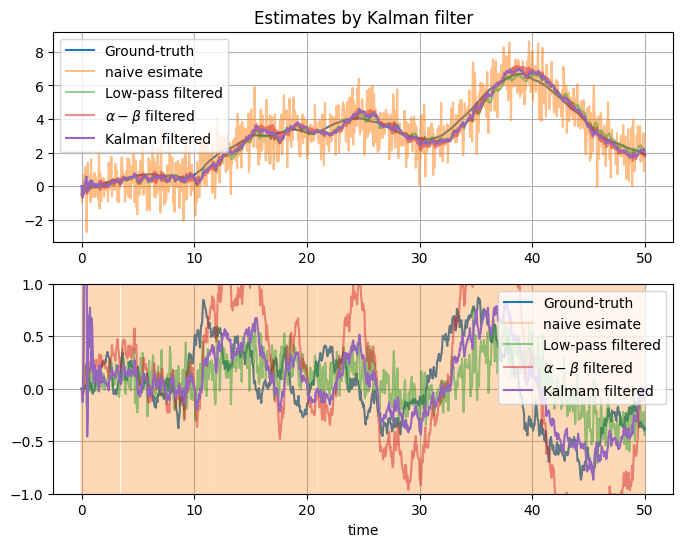

In [35]:
x_es_K = np.zeros([len(p_naive),2])
x_es_K[0] = [0,0]
x_sp_K = np.zeros([len(p_naive),2])
y_es_K = np.zeros([len(p_naive),1])
cov_t = 10 * np.eye(2)
cov_v = np.eye(1)
cov_w = B@B.T
for t in range(len(p_naive)-1):
  x_sp_K[t+1] = A@x_es_K[t]
  #현재 위치를 속도기반으로 예측
  y_es_K[t] = C@x_es_K[t]
  #카르만 게인 생성
  K_t = A@cov_t@C.T@np.linalg.inv(C@cov_t@C.T + cov_v)
  #미래의 위치 예측
  x_es_K[t+1] = x_sp_K[t+1] + K_t@(y[:,t]-y_es_K[t])
  cov_t = A@cov_t@A.T - A@cov_t@C.T@np.linalg.inv(C@cov_t@C.T + cov_v)@C@cov_t @A.T +cov_w

plt.figure(figsize=(8,6), dpi=100)

plt.subplot(2,1,1)
plt.title(r"Estimates by Kalman filter")
plt.plot(ts,x[0,:], label='Ground-truth')
plt.plot(ts[:-1],p_naive, alpha=0.5, label='naive esimate')
plt.plot(ts[:-1],p_lpf,  alpha=0.5,label='Low-pass filtered')
plt.plot(ts[:-1],p_es, alpha=0.5, label= r'$\alpha-\beta$ filtered')
plt.plot(ts[:-1],x_es_K[:,0], label='Kalman filtered')
plt.ylabel(r'')
plt.legend()
plt.grid()
plt.subplot(2,1,2)
plt.plot(ts,x[1,:], label='Ground-truth')
plt.plot(ts[:-1],v_naive, alpha=0.3, label='naive esimate')
plt.plot(ts[:-1],v_lpf,  alpha=0.5,label='Low-pass filtered')
plt.plot(ts[:-1],v_es, alpha=0.5, label= r'$\alpha-\beta$ filtered')
plt.plot(ts[:-1],x_es_K[:,1], label='Kalmam filtered')
plt.ylim([-1,1])
plt.xlabel('time')
plt.ylabel(r'')
plt.legend()
plt.grid()
plt.show()